Using Variational Autoencoders to reconstruct the images into proper size

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

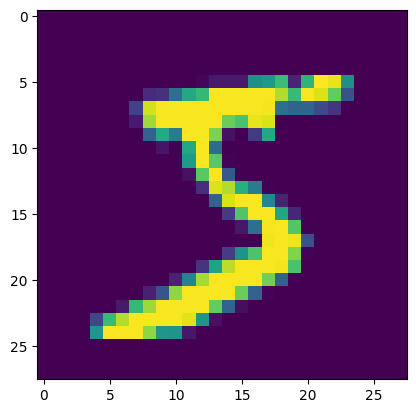

In [ ]:
plt.imshow(X_train[0])

In [ ]:
class sampling(keras.layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
latent_dim = 2

#Encoder
encoder_inputs = keras.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(32,(3,3),activation="relu", strides=2, padding="same")(encoder_inputs)
x = keras.layers.Conv2D(64,(3,3), activation="relu", strides=2, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(16, activation="relu")(x)
z_mean = keras.layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = keras.layers.Dense(latent_dim, name="z_log_var")(x)
z = sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

#Decoder
latent_inputs = keras.layers.Dense(latent_dim, activation='relu')(z)
x = keras.layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = keras.layers.Reshape((7, 7, 64))(x)
x = keras.layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = keras.layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = keras.layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

#Autoencoder
autoencoder = keras.Model(encoder_inputs,decoder_outputs, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                        

In [ ]:
autoencoder.compile(optimizer='adam',loss='mse')

In [ ]:
autoencoder.fit(X_train,X_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 123s 71ms/step - loss: 0.0556 - val_loss: 0.0472
Epoch 2/3
1688/1688 [==============================] - 113s 67ms/step - loss: 0.0461 - val_loss: 0.0435
Epoch 3/3
1688/1688 [==============================] - 111s 66ms/step - loss: 0.0438 - val_loss: 0.0419


1/1 [==============================] - 1s 623ms/step


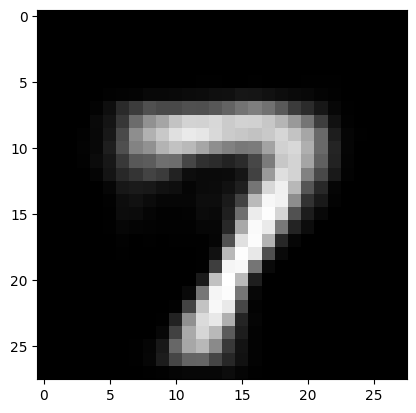

In [ ]:
ae_out = autoencoder.predict([X_test[0].reshape(-1,28,28,1)])[0]
plt.imshow(ae_out, cmap='gray')

In [ ]:
ae_out_np = np.ndarray(3)
ae_out_np.size

3

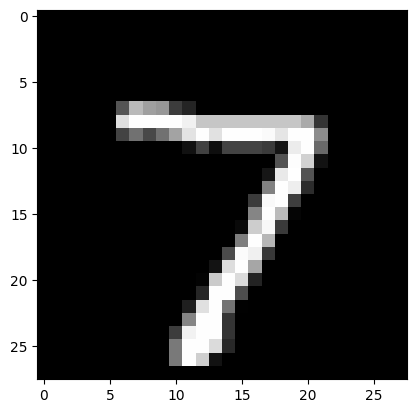

In [ ]:
plt.imshow(X_test[0],cmap='gray')